In [1]:
!pip install selenium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [3]:
macbook_air=[]

In [4]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac   

In [5]:
macbook_air

['\n\n  Bought it from Amazon for exchange and Amazon pay benefits.This is a significant update for me from 2015 MacBook Pro.This machine is faster than Intel counterparts because of the new M1 chip. Keyboards, display are of top notch (Apple standard).Battery is super, average 10 hours work consumed only 20%.Though the webcam is average but happy with overall performance.\n\n',
 '\n\n  I will not renew my prime membership\n\n',
 "\n\n\n            Your browser does not support HTML5 video.\n        \n\n\n  \xa0This is the first time i encounter such problem in apple products as i am a big fan of apple products usually they are known for their product long life but macbook air with m1 chip is a big disaster. It is dead within 3 days.Amazon please do something! After spending such fat money i can't bear any tension running behind service center. And the apple service center in patna.. omg they lost the ability to hear from their customers long back. And once you contact apple then they 

In [6]:
len(macbook_air)

246

In [7]:
rev={"review":macbook_air}

In [8]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [9]:
review_data

,review
0,"\n\n Bought it from Amazon for exchange and Amazon pay benefits.This is a significant update for me from 2015 MacBook Pro.This machine is faster than Intel counterparts because of the new M1 chip. Keyboards, display are of top notch (Apple standard).Battery is super, average 10 hours work consumed only 20%.Though the webcam is average but happy with overall performance.\n\n"
1,\n\n I will not renew my prime membership\n\n
2,\n\n\n Your browser does not support HTML5 video.\n \n\n\n This is the first time i encounter such problem in apple products as i am a big fan of apple products usually they are known for their product long life but macbook air with m1 chip is a big disaster. It is dead within 3 days.Amazon please do something! After spending such fat money i can't bear any tension running behind service center. And the apple service center in patna.. omg they lost the ability to hear from their customers long back. And once you contact apple then they will tell you that apple is not responsible for the products sold by any third party website. The max they can do is to repair the system i mean really man? You buy new system and then give it to the service center for 3-4 weeks.\n\n
3,"\n\n if you are a person who ever thought of buying a high performance laptop at a great bargain, this is it ! An Apple Mac with alien tech capable of competing with i9 processor at a price of that processor unit alone. Got it with a great discount and exchange price making my choice a bliss.Speed - Amazing - 10/10Finally a laptop which will say ""Bring it On""Sound - Awesome - 10/10watch a movie an experience apple magic. I felt that surround sound so many times.Display - Kickass - 10/10I was unsure to whether I will like this 13.3)Ease of use - 10/10Get ready to become addicted !Handling - 10/10Light as a feather. You will feel scared almost everytime you take itBattery - Exceptional - 10/10 - Sure that you will miss its charger !I got 17hrs and 15% battery left on one charge over tw..."
4,"\n\n Hi, I have been an apple user- still have an old 2011 model. Then i switched back to dell for around 4 years. It's all good and smooth with Dell. And very recently I thought let me buy myself an Air. I like that its super sleek and somehow grey color is one of my favourites. So no surprizes the laptop comes in a nice packaging, (thanks to amazon for there on time and easy delivery). The only con of apple air is that its pricey but yes (if you are like me-you will realise its soon that in a long run, how this becomes such an important part of your life, its much more cheaper in value)Super Pro's1. M1 processors are highly efficient in processing. Also thanks to SSD2. Battery life is crazy- last for 15-16 hours easily3. Look and Design (there's not much to say- its very obvious)- S..."
...,...
241,\n\n Nice and clean design. Screen has a little thicker bezels and the body gets extremely cold in winters. Other than that i love how it sounds and other multimedia features. Battery life is exceptional and the m1 chip is a powerhouse.\n\n
242,"\n\n\n Your browser does not support HTML5 video.\n \n\n\n Using it from past 45 days daily for 9-10 hours ( even more ).Cons-1. Some apps are not optimized and crashes a lot ( like chromium which I have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. You need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. Charger- Apple just hate chargers and charging speed charger included is 30W only and it gets really really hot while charging. Charging is very slow.4. No upgrade option - you can't upgrade ram or storage after buying5. Keyboard- feels fragile may be because of slim profile of laptop and only one type of light is th..."
243,\n\n A bit expensive when we compare with today's intel or AMD based windows laptops with rtx 30 graphics . But this apple M1 terms of 

In [10]:
text=" ".join(review_data)

In [11]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [12]:
review_data

,review
0,"bought it from amazon for exchange and amazon pay benefits.this is a significant update for me from 2015 macbook pro.this machine is faster than intel counterparts because of the new m1 chip. keyboards, display are of top notch (apple standard).battery is super, average 10 hours work consumed only 20%.though the webcam is average but happy with overall performance."
1,i will not renew my prime membership
2,\n your browser does not support html5 video.\n \n this is the first time i encounter such problem in apple products as i am a big fan of apple products usually they are known for their product long life but macbook air with m1 chip is a big disaster. it is dead within 3 days.amazon please do something! after spending such fat money i can't bear any tension running behind service center. and the apple service center in patna.. omg they lost the ability to hear from their customers long back. and once you contact apple then they will tell you that apple is not responsible for the products sold by any third party website. the max they can do is to repair the system i mean really man? you buy new system and then give it to the service center for 3-4 weeks.
3,"if you are a person who ever thought of buying a high performance laptop at a great bargain, this is it ! an apple mac with alien tech capable of competing with i9 processor at a price of that processor unit alone. got it with a great discount and exchange price making my choice a bliss.speed - amazing - 10/10finally a laptop which will say ""bring it on""sound - awesome - 10/10watch a movie an experience apple magic. i felt that surround sound so many times.display - kickass - 10/10i was unsure to whether i will like this 13.3)ease of use - 10/10get ready to become addicted !handling - 10/10light as a feather. you will feel scared almost everytime you take itbattery - exceptional - 10/10 - sure that you will miss its charger !i got 17hrs and 15% battery left on one charge over two da..."
4,"hi, i have been an apple user- still have an old 2011 model. then i switched back to dell for around 4 years. it's all good and smooth with dell. and very recently i thought let me buy myself an air. i like that its super sleek and somehow grey color is one of my favourites. so no surprizes the laptop comes in a nice packaging, (thanks to amazon for there on time and easy delivery). the only con of apple air is that its pricey but yes (if you are like me-you will realise its soon that in a long run, how this becomes such an important part of your life, its much more cheaper in value)super pro's1. m1 processors are highly efficient in processing. also thanks to ssd2. battery life is crazy- last for 15-16 hours easily3. look and design (there's not much to say- its very obvious)- super..."
...,...
241,nice and clean design. screen has a little thicker bezels and the body gets extremely cold in winters. other than that i love how it sounds and other multimedia features. battery life is exceptional and the m1 chip is a powerhouse.
242,"\n your browser does not support html5 video.\n \n using it from past 45 days daily for 9-10 hours ( even more ).cons-1. some apps are not optimized and crashes a lot ( like chromium which i have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. you need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. charger- apple just hate chargers and charging speed charger included is 30w only and it gets really really hot while charging. charging is very slow.4. no upgrade option - you can't upgrade ram or storage after buying5. keyboard- feels fragile may be because of slim profile of laptop and only one type of light is there, whi..."
243,a bit expensive when we compare with today's intel or amd based windows laptops with rtx 30 graphics . but this apple m1 terms of overall performance . it is far beyond what wi

In [13]:
text=" ".join(review_data["review"])

In [14]:
text

'  bought it from amazon for exchange and amazon pay benefits.this is a significant update for me from 2015 macbook pro.this machine is faster than intel counterparts because of the new m1 chip. keyboards, display are of top notch (apple standard).battery is super, average 10 hours work consumed only 20%.though the webcam is average but happy with overall performance.   i will not renew my prime membership \n            your browser does not support html5 video.\n        \n  \xa0this is the first time i encounter such problem in apple products as i am a big fan of apple products usually they are known for their product long life but macbook air with m1 chip is a big disaster. it is dead within 3 days.amazon please do something! after spending such fat money i can\'t bear any tension running behind service center. and the apple service center in patna.. omg they lost the ability to hear from their customers long back. and once you contact apple then they will tell you that apple is not 

In [15]:
text_tokens = word_tokenize(text)

In [16]:
text_tokens

['bought',
 'it',
 'from',
 'amazon',
 'for',
 'exchange',
 'and',
 'amazon',
 'pay',
 'benefits.this',
 'is',
 'a',
 'significant',
 'update',
 'for',
 'me',
 'from',
 '2015',
 'macbook',
 'pro.this',
 'machine',
 'is',
 'faster',
 'than',
 'intel',
 'counterparts',
 'because',
 'of',
 'the',
 'new',
 'm1',
 'chip',
 '.',
 'keyboards',
 ',',
 'display',
 'are',
 'of',
 'top',
 'notch',
 '(',
 'apple',
 'standard',
 ')',
 '.battery',
 'is',
 'super',
 ',',
 'average',
 '10',
 'hours',
 'work',
 'consumed',
 'only',
 '20',
 '%',
 '.though',
 'the',
 'webcam',
 'is',
 'average',
 'but',
 'happy',
 'with',
 'overall',
 'performance',
 '.',
 'i',
 'will',
 'not',
 'renew',
 'my',
 'prime',
 'membership',
 'your',
 'browser',
 'does',
 'not',
 'support',
 'html5',
 'video',
 '.',
 'this',
 'is',
 'the',
 'first',
 'time',
 'i',
 'encounter',
 'such',
 'problem',
 'in',
 'apple',
 'products',
 'as',
 'i',
 'am',
 'a',
 'big',
 'fan',
 'of',
 'apple',
 'products',
 'usually',
 'they',
 'are',

In [17]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [18]:
tf=TfidfVectorizer()

In [19]:
text_tf=tf.fit_transform(text_without_sw)

In [20]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [21]:
df

,000,000rs,10,100,10000,10finally,10get,10hours,10i,10k,...,years,yes,yet,you,youtube,yu,zephyrus,zero,zips,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
words_list=" ".join(df)

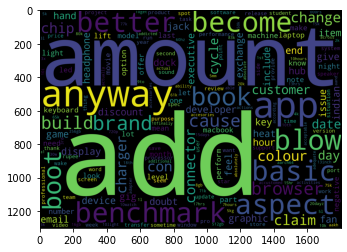

In [23]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [24]:
with open ("C://datasets//positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]


In [25]:
with open ("C://datasets//negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]    

In [26]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [27]:
pos_text=" ".join([word for word in df if not word  in positive_words])

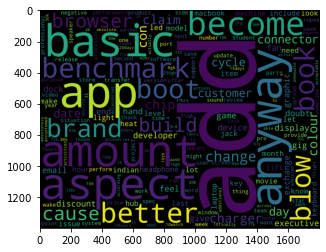

In [28]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

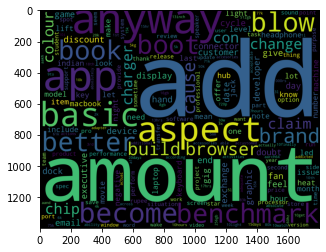

In [29]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [30]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"bought it from amazon for exchange and amazon pay benefits.this is a significant update for me from 2015 macbook pro.this machine is faster than intel counterparts because of the new m1 chip. keyboards, display are of top notch (apple standard).battery is super, average 10 hours work consumed only 20%.though the webcam is average but happy with overall performance.",0.588468,0.204966
1,i will not renew my prime membership,0.000000,0.000000
2,\n your browser does not support html5 video.\n \n this is the first time i encounter such problem in apple products as i am a big fan of apple products usually they are known for their product long life but macbook air with m1 chip is a big disaster. it is dead within 3 days.amazon please do something! after spending such fat money i can't bear any tension running behind service center. and the apple service center in patna.. omg they lost the ability to hear from their customers long back. and once you contact apple then they will tell you that apple is not responsible for the products sold by any third party website. the max they can do is to repair the system i mean really man? you buy new system and then give it to the service center for 3-4 weeks.,0.309230,-0.059270
3,"if you are a person who ever thought of buying a high performance laptop at a great bargain, this is it ! an apple mac with alien tech capable of competing with i9 processor at a price of that processor unit alone. got it with a great discount and exchange price making my choice a bliss.speed - amazing - 10/10finally a laptop which will say ""bring it on""sound - awesome - 10/10watch a movie an experience apple magic. i felt that surround sound so many times.display - kickass - 10/10i was unsure to whether i will like this 13.3)ease of use - 10/10get ready to become addicted !handling - 10/10light as a feather. you will feel scared almost everytime you take itbattery - exceptional - 10/10 - sure that you will miss its charger !i got 17hrs and 15% battery left on one charge over two da...",0.619942,0.331667
4,"hi, i have been an apple user- still have an old 2011 model. then i switched back to dell for around 4 years. it's all good and smooth with dell. and very recently i thought let me buy myself an air. i like that its super sleek and somehow grey color is one of my favourites. so no surprizes the laptop comes in a nice packaging, (thanks to amazon for there on time and easy delivery). the only con of apple air is that its pricey but yes (if you are like me-you will realise its soon that in a long run, how this becomes such an important part of your life, its much more cheaper in value)super pro's1. m1 processors are highly efficient in processing. also thanks to ssd2. battery life is crazy- last for 15-16 hours easily3. look and design (there's not much to say- its very obvious)- super...",0.549769,0.246458
...,...,...,...
241,nice and clean design. screen has a little thicker bezels and the body gets extremely cold in winters. other than that i love how it sounds and other multimedia features. battery life is exceptional and the m1 chip is a powerhouse.,0.693750,0.136979
242,"\n your browser does not support html5 video.\n \n using it from past 45 days daily for 9-10 hours ( even more ).cons-1. some apps are not optimized and crashes a lot ( like chromium which i have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. you need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. charger- apple just hate chargers and charging speed charger included is 30w only and it gets really really hot while charging. charging is very slow.4. no upgrade option - you can't upgrade ram or storage after buying5. keyboard- feels fragile may be because of slim profile of laptop and only one type of light is there, whi...",0.641049,0.227222
243,a bit expensive whe

In [31]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"bought it from amazon for exchange and amazon pay benefits.this is a significant update for me from 2015 macbook pro.this machine is faster than intel counterparts because of the new m1 chip. keyboards, display are of top notch (apple standard).battery is super, average 10 hours work consumed only 20%.though the webcam is average but happy with overall performance.",0.588468,0.204966,Positive
1,i will not renew my prime membership,0.000000,0.000000,Neutral
2,\n your browser does not support html5 video.\n \n this is the first time i encounter such problem in apple products as i am a big fan of apple products usually they are known for their product long life but macbook air with m1 chip is a big disaster. it is dead within 3 days.amazon please do something! after spending such fat money i can't bear any tension running behind service center. and the apple service center in patna.. omg they lost the ability to hear from their customers long back. and once you contact apple then they will tell you that apple is not responsible for the products sold by any third party website. the max they can do is to repair the system i mean really man? you buy new system and then give it to the service center for 3-4 weeks.,0.309230,-0.059270,Negative
3,"if you are a person who ever thought of buying a high performance laptop at a great bargain, this is it ! an apple mac with alien tech capable of competing with i9 processor at a price of that processor unit alone. got it with a great discount and exchange price making my choice a bliss.speed - amazing - 10/10finally a laptop which will say ""bring it on""sound - awesome - 10/10watch a movie an experience apple magic. i felt that surround sound so many times.display - kickass - 10/10i was unsure to whether i will like this 13.3)ease of use - 10/10get ready to become addicted !handling - 10/10light as a feather. you will feel scared almost everytime you take itbattery - exceptional - 10/10 - sure that you will miss its charger !i got 17hrs and 15% battery left on one charge over two da...",0.619942,0.331667,Positive
4,"hi, i have been an apple user- still have an old 2011 model. then i switched back to dell for around 4 years. it's all good and smooth with dell. and very recently i thought let me buy myself an air. i like that its super sleek and somehow grey color is one of my favourites. so no surprizes the laptop comes in a nice packaging, (thanks to amazon for there on time and easy delivery). the only con of apple air is that its pricey but yes (if you are like me-you will realise its soon that in a long run, how this becomes such an important part of your life, its much more cheaper in value)super pro's1. m1 processors are highly efficient in processing. also thanks to ssd2. battery life is crazy- last for 15-16 hours easily3. look and design (there's not much to say- its very obvious)- super...",0.549769,0.246458,Positive
...,...,...,...,...
241,nice and clean design. screen has a little thicker bezels and the body gets extremely cold in winters. other than that i love how it sounds and other multimedia features. battery life is exceptional and the m1 chip is a powerhouse.,0.693750,0.136979,Positive
242,"\n your browser does not support html5 video.\n \n using it from past 45 days daily for 9-10 hours ( even more ).cons-1. some apps are not optimized and crashes a lot ( like chromium which i have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. you need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. charger- apple just hate chargers and charging speed charger included is 30w only and it gets really really hot while charging. charging is very slow.4. no upgrade option - you can't upgrade ram or storage after buying5. keyboard- feels fragile may be because of slim profile of laptop and only one type of

In [32]:
review_data['analysis'].value_counts()

Positive    198
Neutral      26
Negative     22
Name: analysis, dtype: int64

In [33]:
#positive comments
((228+33)/280)*100

93.21428571428572

In [34]:
#negative comments
(19/199)*100

9.547738693467336

so in this review data only 9% is about the negative comments so the macbook air product Received good product reviews from users